In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming X and y are already defined from your dataset

model = LogisticRegression(max_iter=1000)  # Ensure sufficient iterations
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy: 0.8498 ± 0.0304


c:\Users\PowerBrand Networks\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.metrics import classification_report

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate and print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the model on scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print(f"Accuracy on scaled data: {accuracy:.4f}")


Accuracy on scaled data: 0.7951


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga']  # Different solvers
}

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test accuracy with best model: {test_accuracy:.4f}")


Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.8487804878048781
Test accuracy with best model: 0.7951


In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_accuracy = xgb_model.score(X_test, y_test)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


Random Forest Accuracy: 0.9854
XGBoost Accuracy: 0.9854


c:\Users\PowerBrand Networks\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:39:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


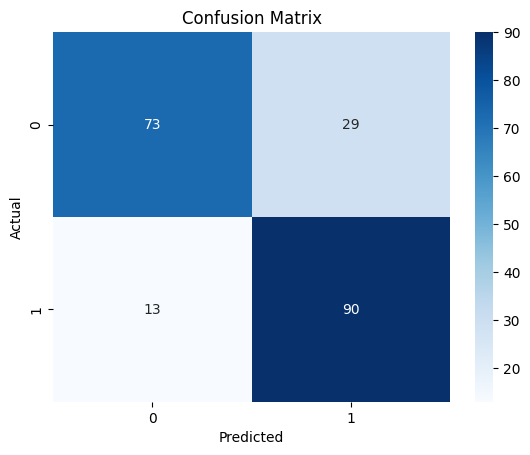

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
